In [1]:
import random
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Data collection

In [2]:
os.chdir(r'C:\Users\ganga\OneDrive\Desktop\Data Sets\data')
print(os.listdir())

['.jovianrc', '03 Customer Retention Case Study Data.xlsx', '03 Customer Retention Case Study.pptx.pdf', '03 Employee Attrition Analysis.pptx.pdf', '07 Customer Churn Case Study Data.xlsx', '07 Customer Churn Case Study.pptx.pdf', 'bank_data.csv', 'creditcard.csv', 'diabetes.csv', 'download.png', 'Employee Attrition Data 0227.xlsx', 'Feature-Engineering-Live-sessions-master', 'Group 05 - Phase 01 and 02 Deliverables.docx.pdf', 'Group 09 - Phase 01 and 02 Deliverables.docx.pdf', 'Handle-Imbalanced-Dataset-master', 'Hyper Parameter Optimization.ipynb', 'K-NEarest-Neighbor-master', 'office_supplies.csv']


In [3]:
bank_data = pd.read_csv('bank_data.csv', sep = ';')

In [4]:
bank_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [5]:
bank_data['target'] = bank_data['default']
bank_data['term_deposit'] = bank_data['y']
bank_data.drop(['default', 'y'], axis = 1, inplace=True)

In [6]:
bank_data.shape

(4521, 17)

In [7]:
bank_data.columns

Index(['age', 'job', 'marital', 'education', 'balance', 'housing', 'loan',
       'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous',
       'poutcome', 'target', 'term_deposit'],
      dtype='object')

In [8]:
obj_var = bank_data.select_dtypes(include = 'object').columns
obj_var

Index(['job', 'marital', 'education', 'housing', 'loan', 'contact', 'month',
       'poutcome', 'target', 'term_deposit'],
      dtype='object')

In [9]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   age           4521 non-null   int64 
 1   job           4521 non-null   object
 2   marital       4521 non-null   object
 3   education     4521 non-null   object
 4   balance       4521 non-null   int64 
 5   housing       4521 non-null   object
 6   loan          4521 non-null   object
 7   contact       4521 non-null   object
 8   day           4521 non-null   int64 
 9   month         4521 non-null   object
 10  duration      4521 non-null   int64 
 11  campaign      4521 non-null   int64 
 12  pdays         4521 non-null   int64 
 13  previous      4521 non-null   int64 
 14  poutcome      4521 non-null   object
 15  target        4521 non-null   object
 16  term_deposit  4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


### Data cleaning

In [10]:
# Duplicate records
bank_data.duplicated().any()

False

In [11]:
# Null values
bank_data.isnull().sum()

age             0
job             0
marital         0
education       0
balance         0
housing         0
loan            0
contact         0
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
poutcome        0
target          0
term_deposit    0
dtype: int64

In [12]:
#outliers
bank_data.describe(percentiles=[0.01, 0.05, 0.1, 0.25, 0.50, 0.75, 0.9, 0.95, 0.99])

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
1%,24.000000,-671.400000,2.000000,10.200000,1.000000,-1.000000,0.000000
5%,27.000000,-162.000000,3.000000,31.000000,1.000000,-1.000000,0.000000
10%,29.000000,0.000000,5.000000,58.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000


In [13]:
# Capping outleirs
bank_data['balance'] = np.where(bank_data['balance']>14200, 14200, bank_data['balance'])
bank_data['duration'] = np.where(bank_data['duration']>1300, 1300, bank_data['duration'])
bank_data['campaign'] = np.where(bank_data['campaign']>16, 16, bank_data['campaign'])
bank_data['pdays'] = np.where(bank_data['pdays']>400, 400, bank_data['pdays'])

In [14]:
# Flooring outleirs
bank_data['balance'] = np.where(bank_data['balance']< -700, -700, bank_data['balance']) 

In [15]:
bank_data.head(2)

,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,target,term_deposit
0,30,unemployed,married,primary,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no,no
1,33,services,married,secondary,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no,no


In [16]:
# Encoding categorical variables
from sklearn.preprocessing import LabelEncoder
le_job = LabelEncoder()
le_marital = LabelEncoder()
le_education = LabelEncoder()
le_housing = LabelEncoder()
le_loan = LabelEncoder()
le_contact = LabelEncoder()
le_month = LabelEncoder()
le_term_deposit = LabelEncoder()
le_target = LabelEncoder()
le_poutcome = LabelEncoder()

In [17]:
bank_data['job'] = le_job.fit_transform(bank_data['job'])
bank_data['marital'] = le_marital.fit_transform(bank_data['marital'])
bank_data['education'] = le_education.fit_transform(bank_data['education'])
bank_data['housing'] = le_housing.fit_transform(bank_data['housing'])
bank_data['loan'] = le_loan.fit_transform(bank_data['loan'])
bank_data['contact'] = le_contact.fit_transform(bank_data['contact'])
bank_data['month'] = le_month.fit_transform(bank_data['month'])
bank_data['term_deposit'] = le_term_deposit.fit_transform(bank_data['term_deposit'])
bank_data['target'] = le_target.fit_transform(bank_data['target'])
bank_data['poutcome'] = le_poutcome.fit_transform(bank_data['poutcome'])

In [18]:
bank_data.head()

,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,target,term_deposit
0,30,10,1,0,1787,0,0,0,19,10,79,1,-1,0,3,0,0
1,33,7,1,1,4789,1,1,0,11,8,220,1,339,4,0,0,0
2,35,4,2,2,1350,1,0,0,16,0,185,1,330,1,0,0,0
3,30,4,1,2,1476,1,1,2,3,6,199,4,-1,0,3,0,0
4,59,1,1,1,0,1,0,2,5,8,226,1,-1,0,3,0,0


### Scaling

In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
scaler = StandardScaler()

In [21]:
scaler.fit(bank_data.drop('target', axis = 1))

StandardScaler()

In [22]:
scaled_features = scaler.transform(bank_data.drop('target', axis = 1))

In [23]:
featured_data = pd.DataFrame(scaled_features, columns=bank_data.columns[:-1])
featured_data.head()

,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,target
0,-1.056270,1.716804,-0.246429,-1.644755,0.177908,-1.142051,-0.424756,-0.723642,0.374052,1.485414,-0.753728,-0.656842,-0.416047,-0.320413,0.444413,-0.360902
1,-0.772583,0.795246,-0.246429,-0.309038,1.415638,0.875617,2.354292,-0.723642,-0.596026,0.819288,-0.168426,-0.656842,3.121918,2.041734,-2.579961,-0.360902
2,-0.583458,-0.126313,1.421396,1.026680,-0.002268,0.875617,-0.424756,-0.723642,0.010273,-1.845220,-0.313714,-0.656842,3.028266,0.270124,-2.579961,-0.360902
3,-1.056270,-0.126313,-0.246429,1.026680,0.049682,0.875617,2.354292,1.495133,-1.566105,0.153161,-0.255598,0.485452,-0.416047,-0.320413,0.444413,-0.360902
4,1.686036,-1.047871,-0.246429,-0.309038,-0.558876,0.875617,-0.424756,1.495133,-1.323585,0.819288,-0.143519,-0.656842,-0.416047,-0.320413,0.444413,-0.360902


In [115]:
X = featured_data
y = bank_data['target']

### Splitting data into train and test tests

In [25]:
training_data = bank_data.sample(frac=0.8, random_state=1)
testing_data = bank_data.drop(training_data.index)

In [26]:
print('Training data :', training_data.shape[0])
print('Testing data :', testing_data.shape[0])

Training data : 3617
Testing data : 904


In [27]:
#Check balance of the data
bank_data['target'].value_counts()

0    4445
1      76
Name: target, dtype: int64

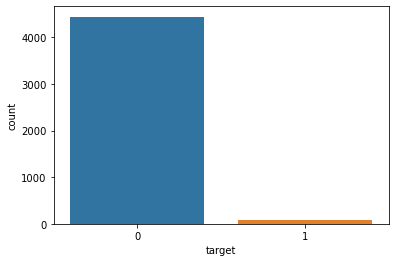

In [28]:
sns.countplot(data = bank_data, x = 'target')
plt.show()

 * The data is highly imbalanced. So we have to apply over sampling

### Over sampling

In [29]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [30]:
ros = RandomOverSampler(random_state=42)

In [31]:
X_train_reshape, y_train_reshape = ros.fit_resample(X, y)

In [32]:
print(X_train_reshape.shape, y_train_reshape.shape)

(8890, 16) (8890,)


In [33]:
from collections import Counter

In [35]:
print('Original :', Counter(y), '\n', 'Reshaped :', Counter(y_train_reshape))

Original : Counter({0: 4445, 1: 76}) 
 Reshaped : Counter({0: 4445, 1: 4445})


In [36]:
X_train, X_test, y_train, y_test = train_test_split(X_train_reshape, y_train_reshape, test_size=0.2, random_state=42)

In [37]:
print(X_train.shape, y_train.shape)

(7112, 16) (7112,)


# Creating model 01

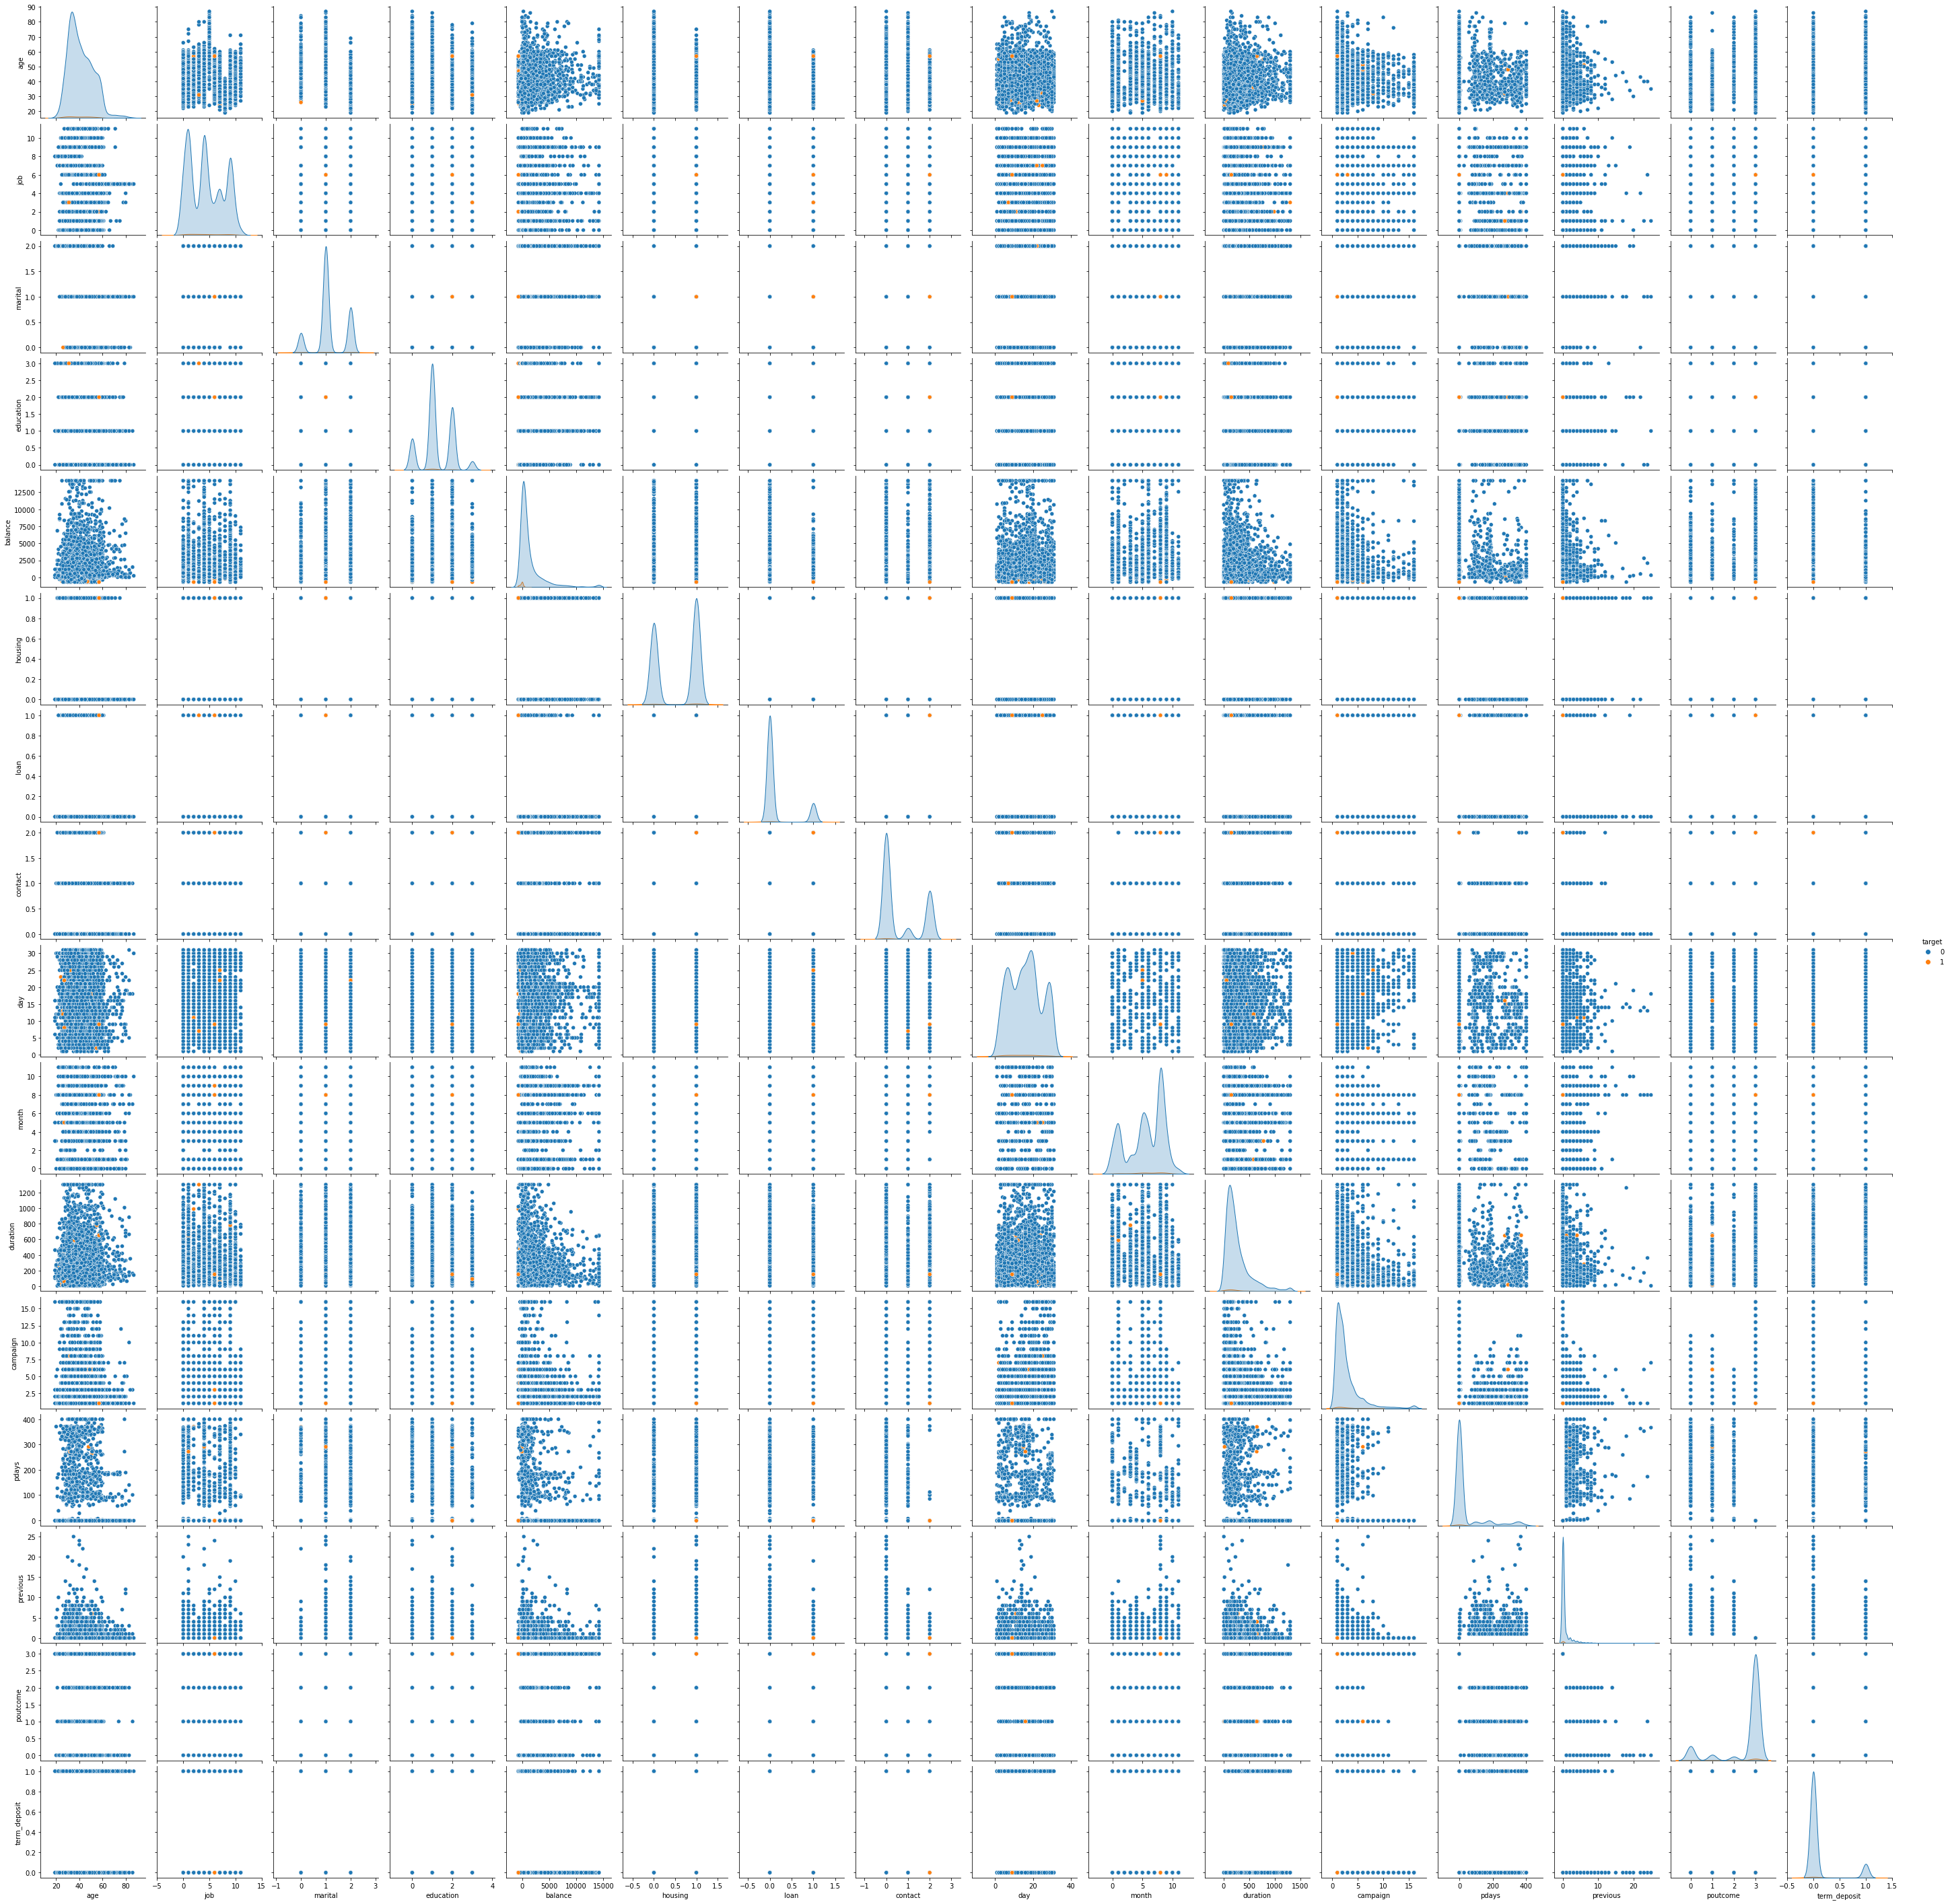

In [38]:
sns.pairplot(bank_data, hue = 'target')
plt.show()

In [39]:
from sklearn.neighbors import KNeighborsClassifier

In [80]:
neigh = KNeighborsClassifier(n_neighbors=3)

### Training model

In [81]:
neigh.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [82]:
predictions = neigh.predict(X_test)
predictions

array([1, 0, 0, ..., 1, 1, 1])

### Evaluating model

In [83]:
#Confusion matrix
cm = confusion_matrix(y_test, predictions)
cm

array([[859,  34],
       [  0, 885]], dtype=int64)

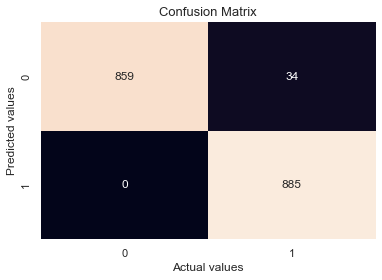

In [84]:
ax = plt.axes()
sns.heatmap(data = cm, annot=True, cbar=False, fmt='g', ax = ax, )
ax.set_xlabel('Actual values', )
ax.set_ylabel('Predicted values')
ax.set_title('Confusion Matrix', fontsize=13)
plt.show()

In [85]:
score = accuracy_score(y_test, predictions)
print('Accuracy :', score, '\n')
print('------------------Classification Report------------------', '\n')
print(classification_report(y_test, predictions))

Accuracy : 0.9808773903262092 

------------------Classification Report------------------ 

              precision    recall  f1-score   support

           0       1.00      0.96      0.98       893
           1       0.96      1.00      0.98       885

    accuracy                           0.98      1778
   macro avg       0.98      0.98      0.98      1778
weighted avg       0.98      0.98      0.98      1778



#### Choosing best k value

In [86]:
error_rate = []
for i in range(1, 10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

In [87]:
print(error_rate)

[0.010686164229471317, 0.010686164229471317, 0.019122609673790775, 0.019122609673790775, 0.028683914510686165, 0.028683914510686165, 0.0359955005624297, 0.0359955005624297, 0.046681664791901015]


In [88]:
print(pred_i)

[1 0 0 ... 1 1 1]


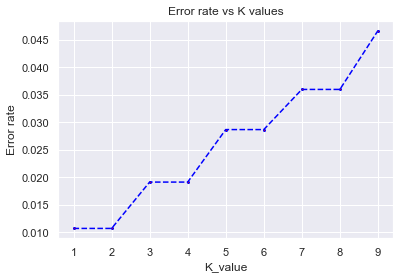

In [99]:
sns.set_theme()
plt.plot(range(1, 10), error_rate, color = 'blue', linestyle = 'dashed',
         marker = 'o', markerfacecolor = 'red', markersize = 2)
plt.title('Error rate vs K values')
plt.xlabel('K_value')
plt.ylabel('Error rate')
plt.show()

### Model 02

In [100]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
predictions_02 = knn.predict(X_test)

In [98]:
#Confusion matrix with k = 2
cm_02 = confusion_matrix(y_test, predictions_02)
cm_02

array([[874,  19],
       [  0, 885]], dtype=int64)

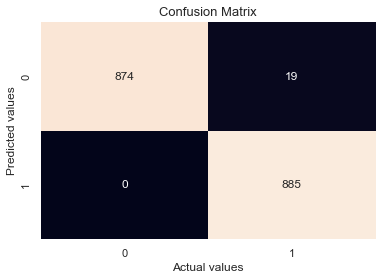

In [103]:
ax = plt.axes()
sns.heatmap(data = cm_02, annot=True, cbar=False, fmt='g', ax = ax)
ax.set_xlabel('Actual values', )
ax.set_ylabel('Predicted values')
ax.set_title('Confusion Matrix 02', fontsize=13)
plt.show()

In [124]:
score_02 = accuracy_score(y_test, predictions_02)
print('Accuracy :', score_02, '\n')
print('------------------Classification Report 02------------------', '\n')
print(classification_report(y_test, predictions_02))

Accuracy : 0.9893138357705287 

------------------Classification Report 02------------------ 

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       893
           1       0.98      1.00      0.99       885

    accuracy                           0.99      1778
   macro avg       0.99      0.99      0.99      1778
weighted avg       0.99      0.99      0.99      1778



### Model 03

In [116]:
from sklearn.ensemble import RandomForestClassifier

In [117]:
clf = RandomForestClassifier(max_depth=2, random_state=0)

In [118]:
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, random_state=0)

In [119]:
predictions_03 = clf.predict(X_test)

In [120]:
cm_03 = confusion_matrix(y_test, predictions_03)
cm_03

array([[730, 163],
       [114, 771]], dtype=int64)

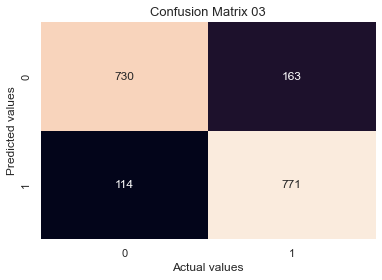

In [121]:
ax = plt.axes()
sns.heatmap(data = cm_03, annot=True, cbar=False, fmt='g', ax = ax)
ax.set_xlabel('Actual values', )
ax.set_ylabel('Predicted values')
ax.set_title('Confusion Matrix 03', fontsize=13)
plt.show()

In [125]:
score_03 = accuracy_score(y_test, predictions_03)
print('Accuracy :', score_03, '\n')
print('------------------Classification Report 03------------------', '\n')
print(classification_report(y_test, predictions_03))

Accuracy : 0.844206974128234 

------------------Classification Report 03------------------ 

              precision    recall  f1-score   support

           0       0.86      0.82      0.84       893
           1       0.83      0.87      0.85       885

    accuracy                           0.84      1778
   macro avg       0.85      0.84      0.84      1778
weighted avg       0.85      0.84      0.84      1778



## Hyper parameter optimization

### Model 04

In [126]:
#Manual parametric tuning
model_01 = RandomForestClassifier(n_estimators=150, criterion='entropy', max_features='sqrt',
                                  min_samples_leaf=10, random_state=42)

In [127]:
model_01.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_features='sqrt',
                       min_samples_leaf=10, n_estimators=150, random_state=42)

In [128]:
predictions_04 = model_01.predict(X_test)

In [130]:
cm_04 = confusion_matrix(y_test, predictions_04)
cm_04

array([[878,  15],
       [  0, 885]], dtype=int64)

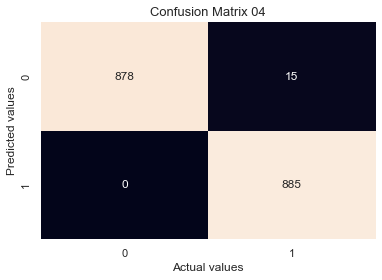

In [131]:
ax = plt.axes()
sns.heatmap(data = cm_04, annot=True, cbar=False, fmt='g', ax = ax)
ax.set_xlabel('Actual values', )
ax.set_ylabel('Predicted values')
ax.set_title('Confusion Matrix 04', fontsize=13)
plt.show()

In [132]:
score_04 = accuracy_score(y_test, predictions_04)
print('Accuracy :', score_04, '\n')
print('------------------Classification Report 03------------------', '\n')
print(classification_report(y_test, predictions_04))

Accuracy : 0.9915635545556806 

------------------Classification Report 03------------------ 

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       893
           1       0.98      1.00      0.99       885

    accuracy                           0.99      1778
   macro avg       0.99      0.99      0.99      1778
weighted avg       0.99      0.99      0.99      1778



#### Randomized search cv

### Model 05

In [133]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
RandomForestClassifier(min_samples_leaf=)

In [135]:
# Number of trees
n_estimators= [int(i) for i in np.linspace(start=100, stop=1000, num=10)]
n_estimators

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]

In [136]:
max_features= ["auto", "sqrt", "log2"]
max_features

['auto', 'sqrt', 'log2']

In [137]:
max_depth= [int(i) for i in np.linspace(10, 1000, 10)]
max_depth

[10, 120, 230, 340, 450, 560, 670, 780, 890, 1000]

In [139]:
min_samples_split= [int(i) for i in np.arange(1, 20, 3)]
min_samples_split

[1, 4, 7, 10, 13, 16, 19]

In [142]:
min_samples_leaf= [int(i) for i in np.arange(2, 20, 3)]
min_samples_leaf

[2, 5, 8, 11, 14, 17]

In [144]:
#Create random grid
random_grid = {'n_estimators':n_estimators, 'max_features':max_features,
              'max_depth':max_depth, 'min_samples_split':min_samples_split,
              'min_samples_leaf':min_samples_leaf, 'criterion':['entropy','gini']}

In [147]:
random_grid

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000],
 'max_features': ['auto', 'sqrt', 'log2'],
 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000],
 'min_samples_split': [1, 4, 7, 10, 13, 16, 19],
 'min_samples_leaf': [2, 5, 8, 11, 14, 17],
 'criterion': ['entropy', 'gini']}

In [148]:
rf = RandomForestClassifier()

In [151]:
rf_randomcv = RandomizedSearchCV(estimator=rf, param_distributions=random_grid, n_iter=100, cv=3,
                                verbose=2, random_state=100, n_jobs=-1)
rf_randomcv.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [2, 5, 8, 11, 14,
                                                             17],
                                        'min_samples_split': [1, 4, 7, 10, 13,
                                                              16, 19],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                       

In [152]:
rf_randomcv.best_params_

{'n_estimators': 1000,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'log2',
 'max_depth': 1000,
 'criterion': 'entropy'}

In [155]:
best_random_grid = rf_randomcv.best_estimator_

In [156]:
predictions_05 = best_random_grid.predict(X_test)

In [159]:
cm_05 = confusion_matrix(y_test, predictions_05)
cm_05

array([[892,   1],
       [  0, 885]], dtype=int64)

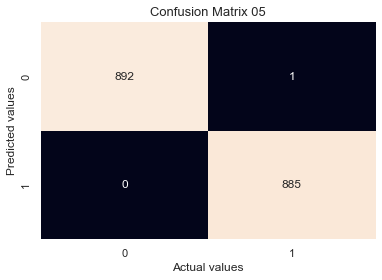

In [160]:
ax = plt.axes()
sns.heatmap(data = cm_05, annot=True, cbar=False, fmt='g', ax = ax)
ax.set_xlabel('Actual values', )
ax.set_ylabel('Predicted values')
ax.set_title('Confusion Matrix 05', fontsize=13)
plt.show()

In [163]:
score_05 = accuracy_score(y_test, predictions_05)
print('Accuracy :', score_05, '\n')
print('------------------Classification Report 05------------------', '\n')
print(classification_report(y_test, predictions_05))

Accuracy : 0.999437570303712 

------------------Classification Report 05------------------ 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       893
           1       1.00      1.00      1.00       885

    accuracy                           1.00      1778
   macro avg       1.00      1.00      1.00      1778
weighted avg       1.00      1.00      1.00      1778

